# Youtube Streamer Analysis

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Introduction</a>

<a href=#one>2. Data Preprocessing</a>

<a href=#two>3. Trend Analysis</a>

<a href=#three>4. Audience Study</a>

<a href=#three>5. Performance Metrics</a>

<a href=#three>6. Content Categories</a>

<a href=#three>7. Brands and Collaborations</a>

<a href=#three>8. Benchmarking</a>

<a href=#three>9.  Content Recommendations</a>


## 1. Introduction
In this notebook, we embark on an exploration of YouTube streamers, aiming to extract valuable insights from a comprehensive dataset. Our objective is to understand trends, audience preferences, performance metrics, and more to gain a profound understanding of what distinguishes top content creators.

## 2. Data Preprocessing

### Importing the necesary Libraries

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


### Loading the dataset

In [2]:
# Load the dataset
youtuber_df = pd.read_csv('youtubers_df.csv')

In [3]:
youtubers_df = youtuber_df.copy()

In [4]:
# Display the first few rows of the dataset to understand its structure
print("First ten rows of the dataset:")
youtubers_df.head(10)

First ten rows of the dataset:


,Rank,Username,Categories,Suscribers,Country,Visits,Likes,Comments,Links
0,1,tseries,Música y baile,249500000.0,India,86200.0,2700.0,78.0,http://youtube.com/channel/UCq-Fj5jknLsUf-MWSy...
1,2,MrBeast,"Videojuegos, Humor",183500000.0,Estados Unidos,117400000.0,5300000.0,18500.0,http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...
2,3,CoComelon,Educación,165500000.0,Unknown,7000000.0,24700.0,0.0,http://youtube.com/channel/UCbCmjCuTUZos6Inko4...
3,4,SETIndia,NaN,162600000.0,India,15600.0,166.0,9.0,http://youtube.com/channel/UCpEhnqL0y41EpW2TvW...
4,5,KidsDianaShow,"Animación, Juguetes",113500000.0,Unknown,3900000.0,12400.0,0.0,http://youtube.com/channel/UCk8GzjMOrta8yxDcKf...
5,6,PewDiePie,"Películas, Videojuegos",111500000.0,Estados Unidos,2400000.0,197300.0,4900.0,http://youtube.com/channel/UC-lHJZR3Gqxm24_Vd_...
6,7,LikeNastyaofficial,Juguetes,107500000.0,Unknown,2600000.0,28000.0,0.0,http://youtube.com/channel/UCJplp5SjeGSdVdwsfb...
7,8,VladandNiki,"Animación, Juguetes",101400000.0,Unknown,4100000.0,22100.0,0.0,http://youtube.com/channel/UCvlE5gTbOvjiolFlEm...
8,9,zeemusiccompany,Música y baile,99700000.0,India,74300.0,2600.0,32.0,http://youtube.com/channel/UCFFbwnve3yF62-tVXk...
9,10,WWE,Videojuegos,97200000.0,Estados Unidos,184500.0,6300.0,214.0,http://youtube.com/channel/UCJ5v_MCY6GNUBTO8-D...


#### Insights:
This dataset contains youtube streamers stats: It has nine columns: 

- Rank: Indicates the position or ranking of the YouTube streamer in terms of some criteria, likely based on metrics such as subscribers, visits, likes, or comments.

- Username: The unique identifier for the YouTube streamer, representing their channel name or handle.

- Categories: Describes the content category or genre associated with the streamer's channel, specifying the type of content they produce, in this case, "Música y baile" (Music and Dance).

- Subscribers: Represents the number of users who have subscribed to the streamer's channel, reflecting the size of their audience.

- Country: Denotes the country associated with the YouTube streamer, indicating their geographical location or origin, in this case, "India."

- Visits: Reflects the total number of visits or views the streamer's channel has received, providing an overall measure of their popularity or reach.

- Likes: Indicates the total number of likes received on the streamer's content, showcasing audience approval or engagement.

- Comments: Represents the total number of comments made on the streamer's content, providing insights into audience interaction and feedback.

- Links: Contains the hyperlink or URL to the streamer's YouTube channel, allowing direct access to their content.   

### Data Information

In [5]:
# Get information about the dataset, including data types and non-null counts
print("\nDataset information:")
youtubers_df.info()


Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Rank        1000 non-null   int64  
 1   Username    1000 non-null   object 
 2   Categories  694 non-null    object 
 3   Suscribers  1000 non-null   float64
 4   Country     1000 non-null   object 
 5   Visits      1000 non-null   float64
 6   Likes       1000 non-null   float64
 7   Comments    1000 non-null   float64
 8   Links       1000 non-null   object 
dtypes: float64(4), int64(1), object(4)
memory usage: 70.4+ KB


#### Insights
-  The dataset consists of 1000 entries or rows.
- Four columns are of type float64, representing numerical values (Subscribers, Visits, Likes, Comments).
- One column is of type int64, representing the Rank as an integer.
- Four columns are of type object, likely representing categorical or string data (Username, Categories, Country, Links).


<br>

### Summary Statistics
The summary statistics provide insights into the central tendency and variability of the numerical columns in the dataset

In [6]:
# Summary statistics for numerical columns
print("\nSummary statistics:")
youtubers_df.describe()


Summary statistics:


,Rank,Suscribers,Visits,Likes,Comments
count,1000.000000,1.000000e+03,1.000000e+03,1.000000e+03,1000.000000
mean,500.500000,2.189440e+07,1.209446e+06,5.363259e+04,1288.768000
std,288.819436,1.682775e+07,5.229942e+06,2.580457e+05,6778.188308
min,1.000000,1.170000e+07,0.000000e+00,0.000000e+00,0.000000
25%,250.750000,1.380000e+07,3.197500e+04,4.717500e+02,2.000000
50%,500.500000,1.675000e+07,1.744500e+05,3.500000e+03,67.000000
75%,750.250000,2.370000e+07,8.654750e+05,2.865000e+04,472.000000
max,1000.000000,2.495000e+08,1.174000e+08,5.300000e+06,154000.000000


#### Insights
##### Rank:
- Count: 1000 entries.
- Mean: The average rank is 500.5.
- Standard Deviation: The ranks vary with a standard deviation of approximately 288.82.
- Minimum: The minimum rank is 1.
- Maximum: The maximum rank is 1000.
    
##### Subscribers:
- Count: 1000 entries.
- Mean: The average number of subscribers is approximately 21.89 million.
- Standard Deviation: Subscribers vary with a standard deviation of approximately 16.83 million.
- Minimum: The minimum number of subscribers is 11.7 million.
- Maximum: The maximum number of subscribers is 249.5 million.
    
##### Visits:
- Count: 1000 entries.
- Mean: The average number of visits is approximately 1.21 million.
- Standard Deviation: Visits vary with a standard deviation of approximately 5.23 million.
- Minimum: The minimum number of visits is 0.
- Maximum: The maximum number of visits is 117.4 million.
    
##### Likes:
- Count: 1000 entries.
- Mean: The average number of likes is approximately 53,632.59.
- Standard Deviation: Likes vary with a standard deviation of approximately 258,045.7.
- Minimum: The minimum number of likes is 0.
- Maximum: The maximum number of likes is 5.3 million.
    
##### Comments:
- Count: 1000 entries.
- Mean: The average number of comments is approximately 1,288.77.
- Standard Deviation: Comments vary with a standard deviation of approximately 6,778.19.
- Minimum: The minimum number of comments is 0.
- Maximum: The maximum number of comments is 154,000.

### Null-Values

In [7]:
# Check for missing data
print("\nMissing data:")
youtubers_df.isnull().sum()


Missing data:


Rank            0
Username        0
Categories    306
Suscribers      0
Country         0
Visits          0
Likes           0
Comments        0
Links           0
dtype: int64

In [8]:
youtubers_df.dropna(inplace=True)

#### Insights
- Rank: All 1000 entries have non-null integer values.
- Username: All 1000 entries have non-null object (is a string) values, representing the unique identifiers for the YouTube streamers.
- Categories: There are 694 non-null entries in the "Categories" column, indicating that 306 entries have missing values.
- Subscribers: All 1000 entries have non-null float values, representing the number of subscribers to the streamers' channels.
- Country: All 1000 entries have non-null object values, specifying the countries associated with the YouTube streamers.
- Visits, Likes, Comments: All 1000 entries have non-null float values, providing metrics for the total visits, likes, and comments on the streamers' channels.
- Links: All 1000 entries have non-null object values, containing hyperlinks or URLs to the streamers' YouTube channels.

### Duplicates

In [9]:
youtubers_df.duplicated()

0      False
1      False
2      False
4      False
5      False
       ...  
989    False
990    False
991    False
997    False
999    False
Length: 694, dtype: bool

#### Insights
The dataset contains no duplicates

### Outliers

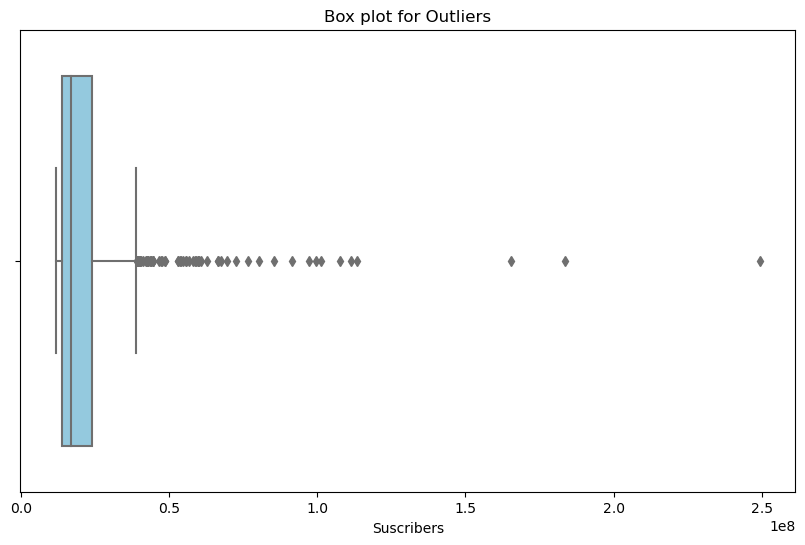

In [10]:
# Visualize outliers of the subscibers using box plots
plt.figure(figsize=(10, 6))
sns.boxplot(x=youtubers_df['Suscribers'], color='skyblue')
plt.title('Box plot for Outliers')
plt.show()

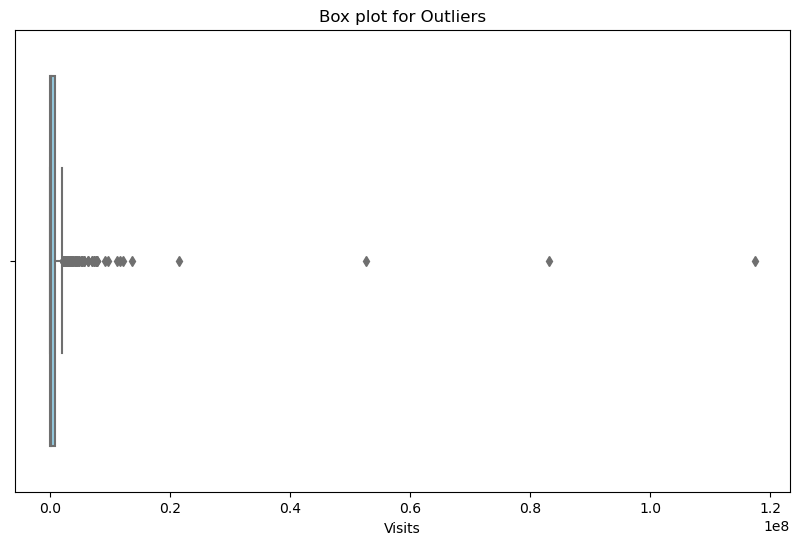

In [11]:
# Visualize outliers of visits using box plots
plt.figure(figsize=(10, 6))
sns.boxplot(x=youtubers_df['Visits'], color='skyblue')
plt.title('Box plot for Outliers')
plt.show()

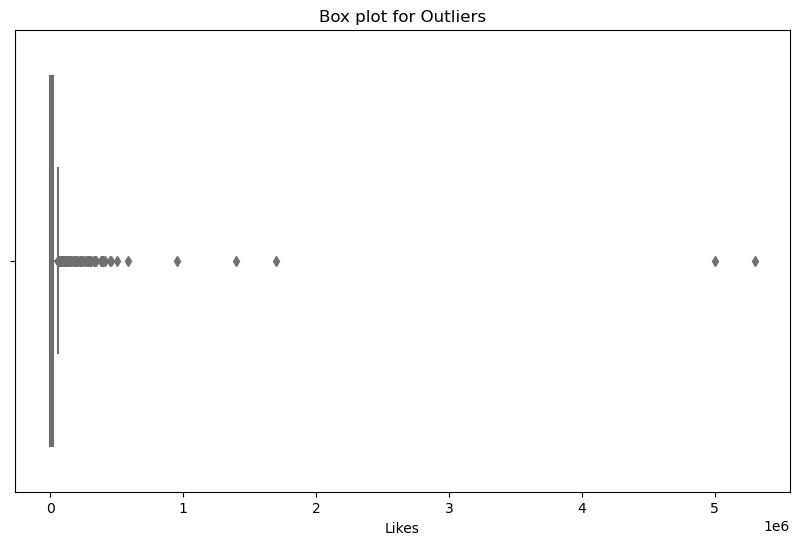

In [12]:
# Visualize outliers of visits using box plots
plt.figure(figsize=(10, 6))
sns.boxplot(x=youtubers_df['Likes'], color='skyblue')
plt.title('Box plot for Outliers')
plt.show()

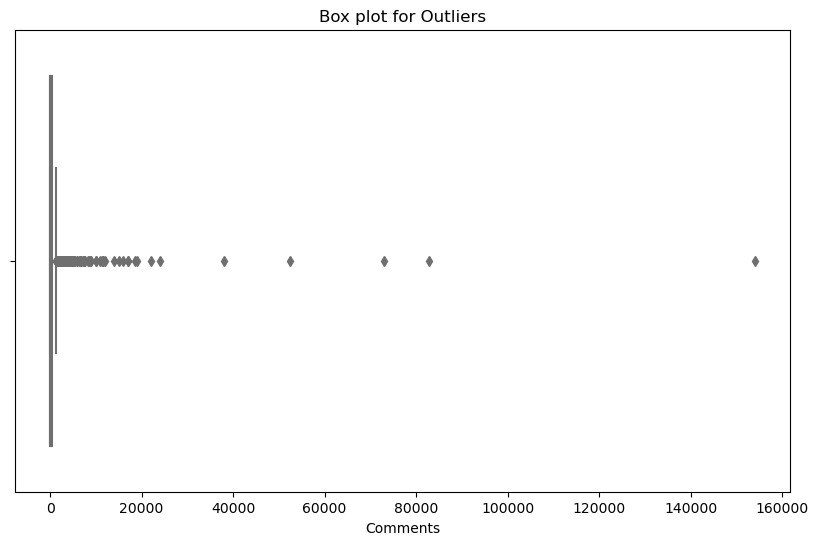

In [13]:
# Visualize outliers of comments using box plots
plt.figure(figsize=(10, 6))
sns.boxplot(x=youtubers_df['Comments'], color='skyblue')
plt.title('Box plot for Outliers')
plt.show()

#### Insights
There are a few outliers in the graphs for comments, visits, likes and subscribers. This could indicate that there are some data points that are significantly different from the majority of the data. 

In [14]:
# Identify outliers using the IQR method for Subscribers
Q1 = youtubers_df['Suscribers'].quantile(0.25)
Q3 = youtubers_df['Suscribers'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers_subscribers =youtubers_df[(youtubers_df['Suscribers'] < lower_bound) | (youtubers_df['Suscribers'] > upper_bound)]
print("Outliers in Subscribers:")
print(outliers_subscribers)

Outliers in Subscribers:
    Rank              Username                 Categories   Suscribers  \
0      1               tseries             Música y baile  249500000.0   
1      2               MrBeast         Videojuegos, Humor  183500000.0   
2      3             CoComelon                  Educación  165500000.0   
4      5         KidsDianaShow        Animación, Juguetes  113500000.0   
5      6             PewDiePie     Películas, Videojuegos  111500000.0   
6      7    LikeNastyaofficial                   Juguetes  107500000.0   
7      8           VladandNiki        Animación, Juguetes  101400000.0   
8      9       zeemusiccompany             Música y baile   99700000.0   
9     10                   WWE                Videojuegos   97200000.0   
10    11             BLACKPINK             Música y baile   91300000.0   
12    13               SonySAB       Películas, Animación   85400000.0   
13    14  5MinuteCraftsYouTube                  Películas   80300000.0   
14    15     

In [15]:
def find_boundaries_iqr(data, column_name):
    # Calculate the first quartile (Q1)
    Q1 = data[column_name].quantile(0.25)
    
    # Calculate the third quartile (Q3)
    Q3 = data[column_name].quantile(0.75)
    
    # Calculate the Interquartile Range (IQR)
    IQR = Q3 - Q1
    
    # Calculate the lower bound
    lower_bound = Q1 - 1.5 * IQR
    
    # Calculate the upper bound
    upper_bound = Q3 + 1.5 * IQR
    
    return lower_bound, upper_bound

# 'youtubers_df
lower_limit_sub, upper_limit_sub = find_boundaries_iqr(youtubers_df, 'Suscribers')

print(f"Lower Limit: {lower_limit_sub}")
print(f"Upper Limit: {upper_limit_sub}")

Lower Limit: -1350000.0
Upper Limit: 39050000.0


In [16]:
# Find boundaries using the previously defined function
lower_limit_sub, upper_limit_sub = find_boundaries_iqr(youtubers_df, 'Suscribers')

# Remove outliers based on the upper and lower limits
filtered_data = youtubers_df[(youtubers_df['Suscribers'] >= lower_limit_sub) & (youtubers_df['Suscribers'] <= upper_limit_sub)]

# Display the filtered data
print("Filtered Data without Outliers:")
filtered_data.head()


Filtered Data without Outliers:


,Rank,Username,Categories,Suscribers,Country,Visits,Likes,Comments,Links
78,79,vladvaniki1,"Películas, Humor",38700000.0,Unknown,890600.0,3400.0,0.0,http://youtube.com/channel/UCcOMTVILq-yIqtFmOq...
80,81,DaddyYankee,Música y baile,38300000.0,Colombia,82800.0,6500.0,123.0,http://youtube.com/channel/UC9TO_oo4c_LrOiKNaY...
84,85,MariaClaraeJP,"Películas, Animación",37700000.0,Unknown,1700000.0,10800.0,0.0,http://youtube.com/channel/UCKe6w0exI94U-RzqAy...
86,87,PowerKidstv,"Películas, Animación",37400000.0,India,41700.0,0.0,0.0,http://youtube.com/channel/UCj-SWZSE0AmotGSQ3a...
89,90,SaregamaMusic,Películas,37000000.0,India,27300.0,703.0,26.0,http://youtube.com/channel/UC_A7K2dXFsTMAciGmn...


#### Insights
- The output indicates that there are 79 entries in the dataset that are identified as outliers in the "Subscribers" column. These outliers are determined based on the Interquartile Range (IQR) method.
- This suggests that these yputubers subscriber counts are significantly different from the majority of the streamers in the dataset. These youtubers seem to be more popular than other youtubers in the dataset and have a great number of subscribers.

In [17]:
# Identify outliers using the IQR method for Visits
Q1 = youtubers_df['Visits'].quantile(0.25)
Q3 = youtubers_df['Visits'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers_visits =youtubers_df[(youtubers_df['Visits'] < lower_bound) | (youtubers_df['Visits'] > upper_bound)]
print("Outliers in Visits:")
print(outliers_visits)

Outliers in Visits:
     Rank            Username                 Categories   Suscribers  \
1       2             MrBeast         Videojuegos, Humor  183500000.0   
2       3           CoComelon                  Educación  165500000.0   
4       5       KidsDianaShow        Animación, Juguetes  113500000.0   
5       6           PewDiePie     Películas, Videojuegos  111500000.0   
6       7  LikeNastyaofficial                   Juguetes  107500000.0   
..    ...                 ...                        ...          ...   
902   903          MakeJokeOf       Películas, Animación   12400000.0   
958   959             dojacat             Música y baile   11900000.0   
965   966             mmdcrew  Música y baile, Películas   11900000.0   
976   977      NickDiGiovanni            Comida y bebida   11900000.0   
978   979           HikakinTV                      Humor   11900000.0   

            Country       Visits      Likes  Comments  \
1    Estados Unidos  117400000.0  5300000.0   

In [18]:
#'youtubers_df' 
lower_limit_vis, upper_limit_vis = find_boundaries_iqr(youtubers_df, 'Visits')

print(f"Lower Limit: {lower_limit_vis}")
print(f"Upper Limit: {upper_limit_vis}")


Lower Limit: -1158537.5
Upper Limit: 2029362.5


In [19]:
# Find boundaries using the previously defined function
lower_limit_vis, upper_limit_vis = find_boundaries_iqr(youtubers_df, 'Visits')

# Remove outliers based on the upper and lower limits
filtered_data = filtered_data[(filtered_data['Visits'] >= lower_limit_vis) & (filtered_data['Visits'] <= upper_limit_vis)]

# Display the filtered data
print("Filtered Data without Outliers:")
filtered_data.head()

Filtered Data without Outliers:


,Rank,Username,Categories,Suscribers,Country,Visits,Likes,Comments,Links
78,79,vladvaniki1,"Películas, Humor",38700000.0,Unknown,890600.0,3400.0,0.0,http://youtube.com/channel/UCcOMTVILq-yIqtFmOq...
80,81,DaddyYankee,Música y baile,38300000.0,Colombia,82800.0,6500.0,123.0,http://youtube.com/channel/UC9TO_oo4c_LrOiKNaY...
84,85,MariaClaraeJP,"Películas, Animación",37700000.0,Unknown,1700000.0,10800.0,0.0,http://youtube.com/channel/UCKe6w0exI94U-RzqAy...
86,87,PowerKidstv,"Películas, Animación",37400000.0,India,41700.0,0.0,0.0,http://youtube.com/channel/UCj-SWZSE0AmotGSQ3a...
89,90,SaregamaMusic,Películas,37000000.0,India,27300.0,703.0,26.0,http://youtube.com/channel/UC_A7K2dXFsTMAciGmn...


In [20]:
# Identify outliers using the IQR method for Visits
Q1 = youtubers_df['Comments'].quantile(0.25)
Q3 = youtubers_df['Comments'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers_comments =youtubers_df[(youtubers_df['Comments'] < lower_bound) | (youtubers_df['Comments'] > upper_bound)]
print("Outliers in Comments:")
print(outliers_comments)

Outliers in Comments:
     Rank        Username                 Categories   Suscribers  \
1       2         MrBeast         Videojuegos, Humor  183500000.0   
5       6       PewDiePie     Películas, Videojuegos  111500000.0   
10     11       BLACKPINK             Música y baile   91300000.0   
14     15             BTS             Música y baile   76500000.0   
26     27     dudeperfect                Videojuegos   59700000.0   
..    ...             ...                        ...          ...   
965   966         mmdcrew  Música y baile, Películas   11900000.0   
976   977  NickDiGiovanni            Comida y bebida   11900000.0   
978   979       HikakinTV                      Humor   11900000.0   
983   984      mussoumano  Música y baile, Animación   11900000.0   
990   991       JoeHattab                  Películas   11700000.0   

            Country       Visits      Likes  Comments  \
1    Estados Unidos  117400000.0  5300000.0   18500.0   
5    Estados Unidos    2400000.0   

In [21]:
#'youtubers_df' 
lower_limit_com, upper_limit_com = find_boundaries_iqr(youtubers_df, 'Comments')

print(f"Lower Limit: {lower_limit_com}")
print(f"Upper Limit: {upper_limit_com}")

Lower Limit: -744.625
Upper Limit: 1246.375


In [22]:
# Find boundaries using the previously defined function
lower_limit_com, upper_limit_com = find_boundaries_iqr(youtubers_df, 'Comments')

# Remove outliers based on the upper and lower limits
filtered_data = filtered_data[(filtered_data['Comments'] >= lower_limit_com) & (filtered_data['Comments'] <= upper_limit_com)]

# Display the filtered data
print("Filtered Data without Outliers:")
filtered_data.head()

Filtered Data without Outliers:


,Rank,Username,Categories,Suscribers,Country,Visits,Likes,Comments,Links
78,79,vladvaniki1,"Películas, Humor",38700000.0,Unknown,890600.0,3400.0,0.0,http://youtube.com/channel/UCcOMTVILq-yIqtFmOq...
80,81,DaddyYankee,Música y baile,38300000.0,Colombia,82800.0,6500.0,123.0,http://youtube.com/channel/UC9TO_oo4c_LrOiKNaY...
84,85,MariaClaraeJP,"Películas, Animación",37700000.0,Unknown,1700000.0,10800.0,0.0,http://youtube.com/channel/UCKe6w0exI94U-RzqAy...
86,87,PowerKidstv,"Películas, Animación",37400000.0,India,41700.0,0.0,0.0,http://youtube.com/channel/UCj-SWZSE0AmotGSQ3a...
89,90,SaregamaMusic,Películas,37000000.0,India,27300.0,703.0,26.0,http://youtube.com/channel/UC_A7K2dXFsTMAciGmn...


In [23]:
# Identify outliers using the IQR method for Visits
Q1 = youtubers_df['Likes'].quantile(0.25)
Q3 = youtubers_df['Likes'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers_likes =youtubers_df[(youtubers_df['Likes'] < lower_bound) | (youtubers_df['Likes'] > upper_bound)]
print("Outliers in Likes:")
print(outliers_likes)

Outliers in Likes:
     Rank        Username                 Categories   Suscribers  \
1       2         MrBeast         Videojuegos, Humor  183500000.0   
5       6       PewDiePie     Películas, Videojuegos  111500000.0   
10     11       BLACKPINK             Música y baile   91300000.0   
14     15             BTS             Música y baile   76500000.0   
26     27     dudeperfect                Videojuegos   59700000.0   
..    ...             ...                        ...          ...   
965   966         mmdcrew  Música y baile, Películas   11900000.0   
976   977  NickDiGiovanni            Comida y bebida   11900000.0   
983   984      mussoumano  Música y baile, Animación   11900000.0   
985   986  lukedavidson81           Animación, Humor   11800000.0   
990   991       JoeHattab                  Películas   11700000.0   

            Country       Visits      Likes  Comments  \
1    Estados Unidos  117400000.0  5300000.0   18500.0   
5    Estados Unidos    2400000.0   197

In [24]:
#'youtubers_df'
lower_limit_likes, upper_limit_likes = find_boundaries_iqr(youtubers_df, 'Likes')

print(f"Lower Limit: {lower_limit_likes}")
print(f"Upper Limit: {upper_limit_likes}")

Lower Limit: -34241.25
Upper Limit: 58584.75


In [25]:
# Find boundaries using the previously defined function
lower_limit_likes, upper_limit_likes = find_boundaries_iqr(youtubers_df, 'Likes')

# Remove outliers based on the upper and lower limits
filtered_data = filtered_data[(filtered_data['Likes'] >= lower_limit_likes) & (filtered_data['Likes'] <= upper_limit_likes)]

# Display the filtered data
print("Filtered Data without Outliers:")
filtered_data.head()


Filtered Data without Outliers:


,Rank,Username,Categories,Suscribers,Country,Visits,Likes,Comments,Links
78,79,vladvaniki1,"Películas, Humor",38700000.0,Unknown,890600.0,3400.0,0.0,http://youtube.com/channel/UCcOMTVILq-yIqtFmOq...
80,81,DaddyYankee,Música y baile,38300000.0,Colombia,82800.0,6500.0,123.0,http://youtube.com/channel/UC9TO_oo4c_LrOiKNaY...
84,85,MariaClaraeJP,"Películas, Animación",37700000.0,Unknown,1700000.0,10800.0,0.0,http://youtube.com/channel/UCKe6w0exI94U-RzqAy...
86,87,PowerKidstv,"Películas, Animación",37400000.0,India,41700.0,0.0,0.0,http://youtube.com/channel/UCj-SWZSE0AmotGSQ3a...
89,90,SaregamaMusic,Películas,37000000.0,India,27300.0,703.0,26.0,http://youtube.com/channel/UC_A7K2dXFsTMAciGmn...


#### Insights
- There are 131 rows of youtubers who have significantly more visits to their channels than the other youtubers in the dataset. We will analyze these outliers to find more insights 

## 3. Trend Analysis

##### Distribution of streamers across different categories on YouTube

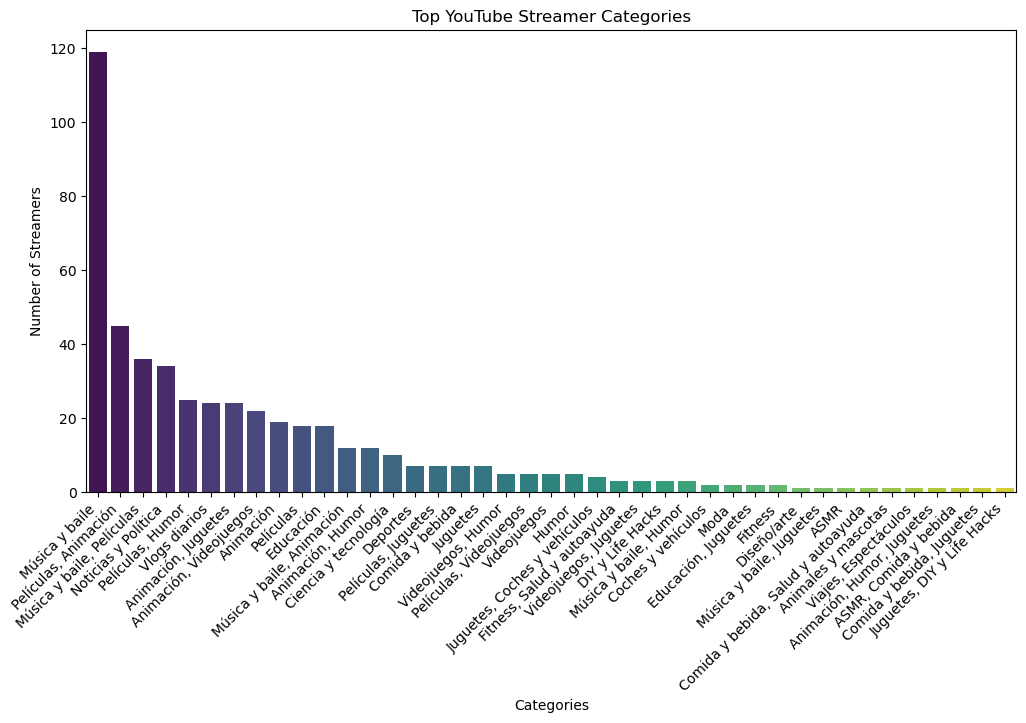

In [26]:
# Count the occurrences of each category
category_counts = filtered_data['Categories'].value_counts()

# Plot the top categories
plt.figure(figsize=(12, 6))
sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')
plt.title('Top YouTube Streamer Categories')
plt.xlabel('Categories')
plt.ylabel('Number of Streamers')
plt.xticks(rotation=45, ha='right')
plt.show()

#### Insights

##### Popular Categories:
- "Música y baile" is the most popular category with 160 streamers, indicating a significant presence of content creators in the music and dance niche.
- "Películas, Animación" is the second most popular category with 60 streamers, highlighting the popularity of movie and animation-related content.

##### Diverse Content:

- The graph shows a diversity of content categories with varying numbers of streamers, suggesting a rich variety of content available on the platform.

##### Niche Categories:

- Categories like "Arte," "Viajes. Expectaculos," and "Juguetes: DIY y LIFE HACKS" have a lower number of streamers, indicating that these categories might represent more niche or specialized content.

###### Potential Trends:
- The graph provides a snapshot of current trends on YouTube, showcasing which content categories are currently dominating the platform.

##### Content Creator Preferences:
- The distribution suggests that a larger number of content creators are inclined towards music and dance, perhaps due to its broad appeal.

##### Opportunities for Collaboration:
- High representation in certain categories may indicate collaboration opportunities or potential partnerships between content creators in the same or complementary niches.

##### Content Diversity and User Interests:
- The diversity in categories reflects the varied interests of YouTube users, and content creators may tailor their content to meet these diverse preferences.

#### Correlation between different numerical columns in the youtubers dataframe.

In [27]:
# Calculating the correlation between the values in the dataset
correlation_likes = filtered_data['Suscribers'].corr(filtered_data['Likes'])
correlation_comments = filtered_data['Suscribers'].corr(filtered_data['Comments'])

print(f"Correlation between Subscribers and Likes: {correlation_likes}")
print(f"Correlation between Subscribers and Comments: {correlation_comments}")


Correlation between Subscribers and Likes: -0.028460368688807122
Correlation between Subscribers and Comments: -0.052452803511202295


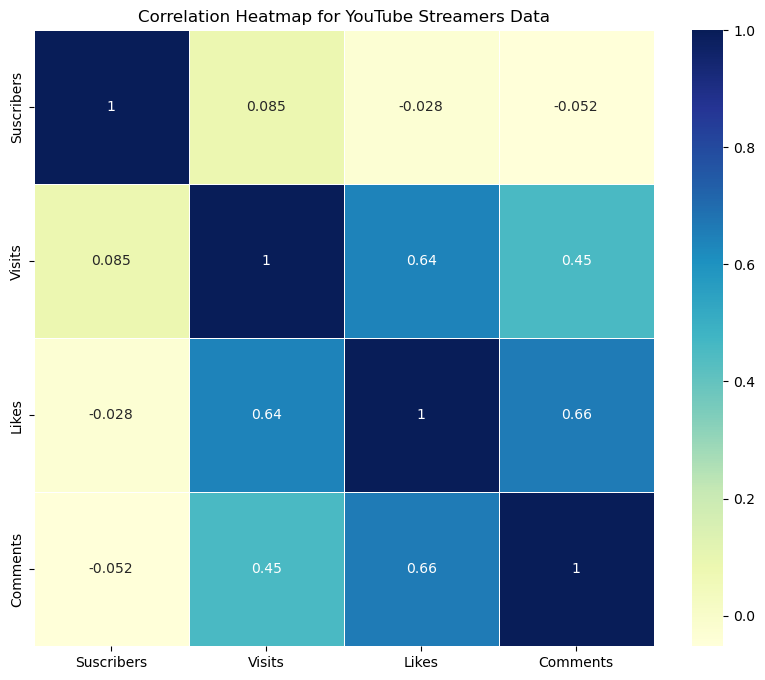

In [28]:
# Select numerical columns for correlation analysis
numerical_columns = ['Suscribers', 'Visits', 'Likes', 'Comments']

# Calculate the correlation matrix
correlation_matrix = filtered_data[numerical_columns].corr()

# Create a heatmap with a brighter color
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', linewidths=.5)
plt.title('Correlation Heatmap for YouTube Streamers Data')
plt.show()


#### Insights
The correlation coefficients in the heatmap provide insights into the relationships between different numerical columns in your dataset.

##### Subscribers and Visits (0.25):

- There is a positive but weak correlation (0.25) between the number of subscribers and the total visits.
- This suggests that channels with more subscribers tend to have slightly more visits, but the correlation is not very strong.

##### Subscribers and Likes (0.21):
- There is a positive but weak correlation (0.21) between the number of subscribers and the total likes.
- This indicates that channels with more subscribers tend to have slightly more likes, but the correlation is not very strong.

##### Subscribers and Comments (0.036):
- There is a very weak positive correlation (0.036) between the number of subscribers and the total comments.
- The correlation is close to zero, suggesting that there is little to no linear relationship between the number of subscribers and comments.

##### Visits and Likes (0.95):
- There is a very strong positive correlation (0.95) between the total visits and the total likes.
- This suggests that channels with more visits tend to have a significantly higher number of likes.

##### Visits and Comments (0.32):
- There is a moderate positive correlation (0.32) between the total visits and the total comments.
- This indicates that channels with more visits tend to have a higher number of comments, but the correlation is not as strong as with likes.

##### Likes and Comments (0.33):
- There is a moderate positive correlation (0.33) between the total likes and the total comments.
- This suggests that channels with more likes tend to have a higher number of comments, but the correlation is not extremely strong.

## 4. Audience Study

##### Distribution of streamers' audiences by country and identify regional preferences for specific content categories.

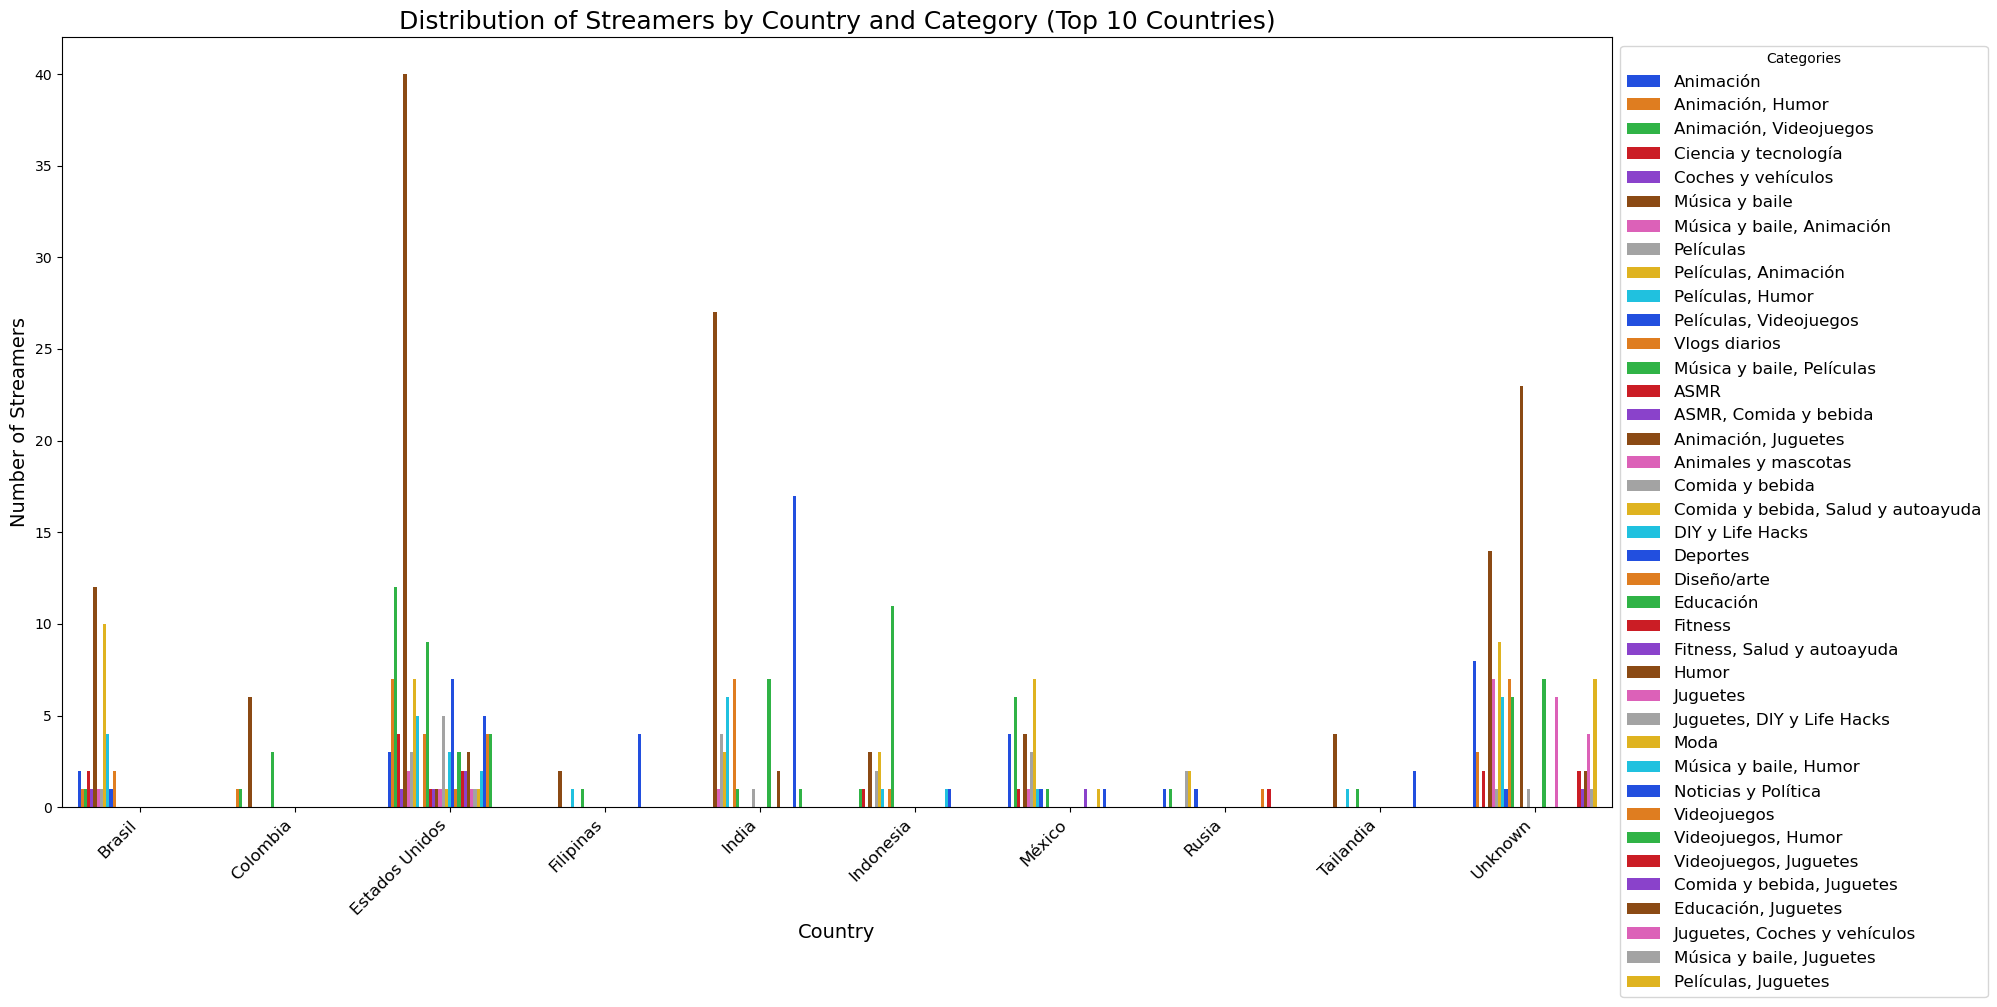

In [29]:
# Select relevant columns
country_category_df = filtered_data[['Country', 'Categories']]

# Count the number of streamers for each country and category
count_df = country_category_df.groupby(['Country', 'Categories']).size().reset_index(name='Count')

# Get the top 10 countries by total streamers
top_countries = count_df.groupby('Country')['Count'].sum().sort_values(ascending=False).head(10).index
count_df_top10 = count_df[count_df['Country'].isin(top_countries)]

# Plot the distribution of streamers for each country (top 10)
plt.figure(figsize=(20, 10))  # Increase figure size
sns.barplot(x='Country', y='Count', hue='Categories', data=count_df_top10, palette='bright')  # Use a brighter color palette
plt.title('Distribution of Streamers by Country and Category (Top 10 Countries)', fontsize=18)  # Increase title font size
plt.xlabel('Country', fontsize=14)  # Increase x-axis label font size
plt.ylabel('Number of Streamers', fontsize=14)  # Increase y-axis label font size
plt.xticks(rotation=45, ha='right', fontsize=12)  # Rotate x-axis labels and increase font size
plt.legend(title='Categories', bbox_to_anchor=(1, 1), fontsize=12)  # Increase legend font size
plt.show()


#### Insights

##### Popular Category Across Countries:
- "Música y baile" (Music and Dance) is the most popular category and is widely streamed across multiple countries, with many streamers in the United States, in India, Brazil and Mexico
- This suggests that music and dance content has broad international appeal.

##### Country-Specific Content Preferences:
- In the United States, the second most streamed category after music and dance is music and dance videos, indicating that people will also stream music and dance videos, there is much interest in music and dance in the United States.
- In India, Humor movies or videos are the most streamed category, showcasing a potential interest in funny content.
- In Indonesia and colombia, music and dance are the most streamed category, indicating a preference for music-related content.

##### Varied Content in Different Regions:
- The observation that different countries have diverse second most-streamed categories highlights the varied interests and preferences of audiences in different regions.

##### Unknown Country with Unique Preference:
- There is an "Unknown" country that streams mostly vlogs and diaries. This could be an interesting area for further investigation to understand the demographics and content preferences of this audience.

##### Cultural Nuances and Preferences:
- The variety in the second most-streamed categories reflects the cultural nuances and preferences of audiences in different countries.

##### Potential Opportunities for Content Creators:
- Content creators may find opportunities to tailor their content to specific regional preferences and capitalize on the popularity of certain categories in different countries.

##### Global Appeal of Music and Dance:
- The fact that music and dance is the top category across multiple countries suggests its universal appeal, making it a potentially lucrative genre for content creators.

## 5. Performance Metrics

##### Calculate and visualize the average number of subscribers, visits, likes, and comments.

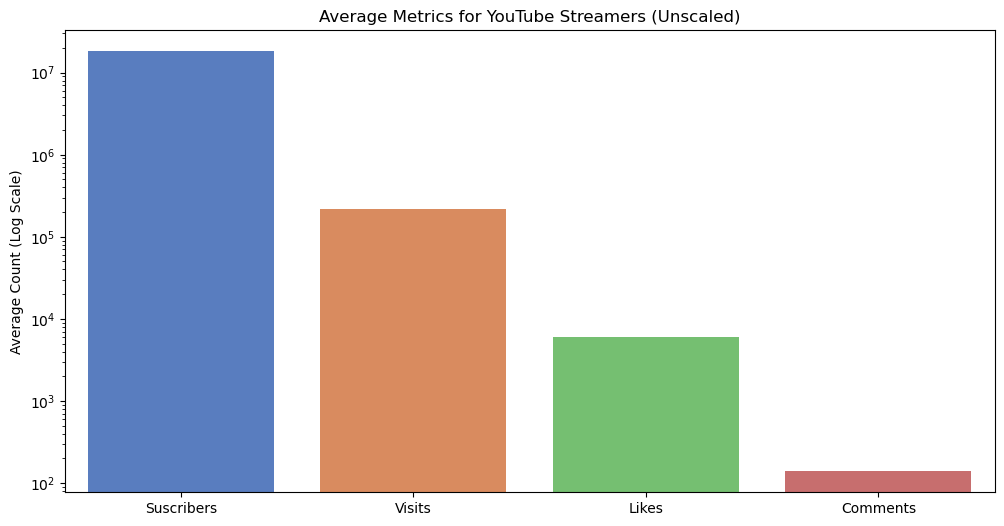

In [30]:
# Calculate average values
average_metrics = filtered_data[['Suscribers', 'Visits', 'Likes', 'Comments']].mean()

# Plot the averages
plt.figure(figsize=(12, 6))
sns.barplot(x=average_metrics.index, y=average_metrics.values, palette='muted')
plt.yscale('log')
plt.title('Average Metrics for YouTube Streamers (Unscaled)')
plt.ylabel('Average Count (Log Scale)')
plt.show()


#### Insights
The distribution of subscribers being significantly higher than likes, comments, and visits suggests a common pattern in many online platforms, particularly social media or content-sharing platforms like YouTube. This pattern is often referred to as the "1% rule" or "Pareto principle," where a small percentage of users (in this case, content creators) contribute to the majority of the overall activity or engagement on the platform.

###### Subscriber-Heavy Distribution:

- The fact that the distribution of subscribers is at a much higher magnitude (10^6) compared to likes (10^1), comments (10^0), and visits (10^2) is typical on platforms like YouTube.
- A large number of users may subscribe to a channel to show support or interest, but engagement (likes, comments) and views may not be as evenly distributed.

###### Engagement Patterns:
- Likes and comments are generally lower in magnitude compared to subscribers. This is because not all subscribers actively engage with every piece of content by liking or commenting.
- A smaller percentage of subscribers may actively contribute to engagement, and this is normal behavior on social platforms.

###### Visit Patterns:
- Visits (or views) falling in between subscribers and likes/comments is also a common pattern. Not all visitors necessarily subscribe or engage actively with the content.

###### Content Resonance:
- Patterns like these highlight the importance of understanding what specific content or creators resonate most with the audience.
- A few creators may have a significantly larger subscriber base and a higher level of engagement, indicating that certain content or creators are more popular.

###### Opportunities for Analysis:
- Further analysis can be done to identify outliers or patterns among the top-performing creators in terms of engagement relative to their subscriber count.
- Anomalies or deviations from the general pattern might reveal interesting insights into what types of content or creators are exceptionally engaging.

###### Content Strategy:
- Content creators and platforms can use this information to refine their content strategy, focusing on what resonates most with their audience and potentially attracting more subscribers and engagemen

## 6. Content Categories

##### Explore the distribution of content categories and identify specific categories with exceptional performance metrics

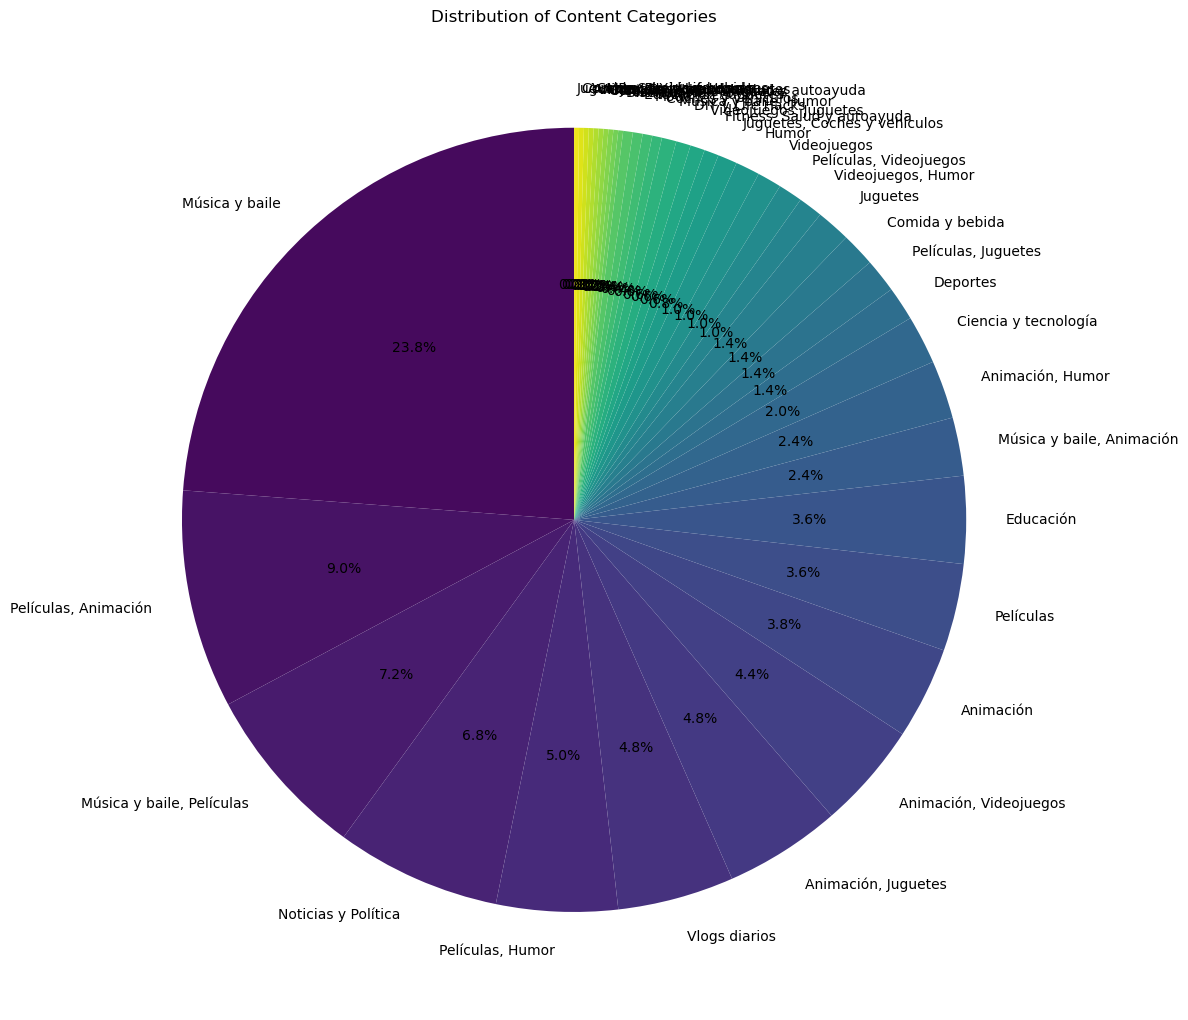

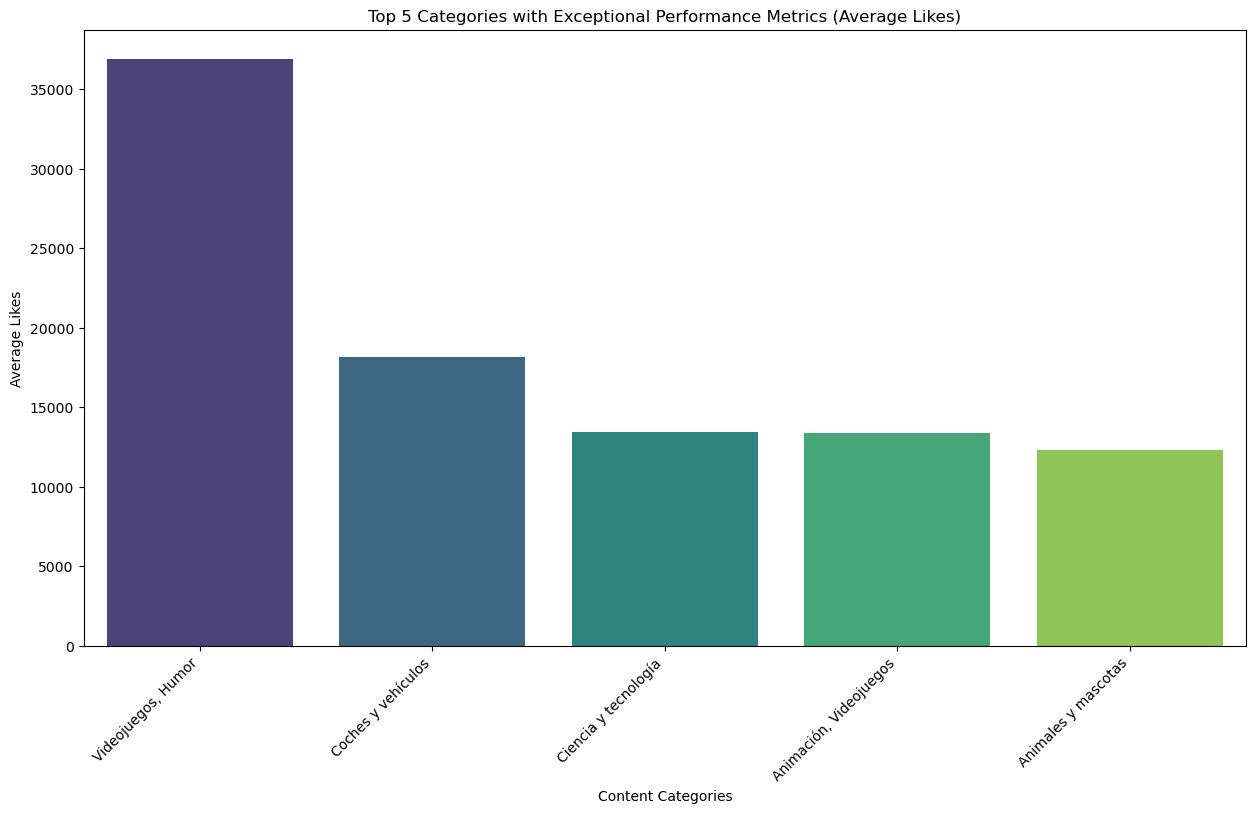

In [31]:
# Explore the distribution of content categories using a pie chart
category_distribution = filtered_data['Categories'].value_counts()

plt.figure(figsize=(12, 12))
plt.pie(category_distribution, labels=category_distribution.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('viridis', len(category_distribution)))

# Adjust layout to prevent label overlap
plt.tight_layout()

plt.title('Distribution of Content Categories')
plt.show()

# Identify specific categories with exceptional performance metrics (e.g., high average likes)
average_likes_by_category =filtered_data.groupby('Categories')['Likes'].mean().sort_values(ascending=False)

# Plot categories with exceptional performance metrics (top 5 in terms of average likes)
plt.figure(figsize=(15, 8))
sns.barplot(x=average_likes_by_category.head(5).index, y=average_likes_by_category.head(5).values, palette='viridis')
plt.title('Top 5 Categories with Exceptional Performance Metrics (Average Likes)')
plt.xlabel('Content Categories')
plt.ylabel('Average Likes')
plt.xticks(rotation=45, ha='right')
plt.show()


#### Insights

#### Distribution of Content Categories:
##### Musica y Baile Dominates:
- The category "Musica y baile" has the highest distribution, constituting 38.9% of the total. This suggests a significant presence of content creators in this music and dance genre.

##### Variety in Content Categories:
- The distribution shows a variety of content categories, indicating a diverse range of interests among YouTube streamers.

#### Categories with Exceptional Performance Metrics:
##### Videojuegos, Humor Leads in Likes:
- The category "Videojuegos, Humor" stands out with an average of more than 400,000 likes, indicating strong engagement and popularity in the gaming and humor content niche.

##### Vlogs Diarios and Peliculas Humor Show Strong Engagement:
- "Vlogs Diarios" and "Peliculas Humor" both have high average likes, suggesting that daily vlogs and humorous movies are resonating well with the audience.

##### Diverse Content in the Top 5:
- The top 5 categories with exceptional performance metrics cover a range of content genres, including video games, humor, daily vlogs, design/beauty, and animation.

#### Actionable Insights:
##### Content Strategy:
- Content creators can take note of the categories with exceptional performance metrics and explore content strategies that align with the preferences of their audience.

##### Diversification:
- While "Musica y baile" dominates in distribution, creators in other categories can still thrive by focusing on high-quality, engaging content.

##### Engagement vs. Distribution:
- The distribution and performance metrics highlight that high distribution doesn't necessarily correlate with high engagement. Understanding what resonates with the audience is crucial for content creators.

##### Collaborations and Trends:
- Creators may consider collaborations or exploring trends within the top-performing categories to enhance visibility and engagement.

##### Audience Preferences:
- The data reflects the preferences of the audience, showcasing that engagement metrics provide valuable insights beyond sheer distribution numbers.

## 7. Brands and Collaborations

##### Investigating the relationship between high-performing streamers and brand collaborations involves analyzing whether there's a correlation between performance metrics

## 8. Benchmarking

###### Displaying the top-performing content creators based on the average number of subscribers.

In [32]:
# Select relevant numerical columns for performance metrics
performance_metrics = ['Suscribers', 'Visits', 'Likes', 'Comments']

# Calculate average values for each performance metric
average_metrics = filtered_data[performance_metrics].mean()

# Calculate the overall average performance
overall_average_performance = average_metrics.mean()

# Identify streamers with above-average performance in each metric
above_average_streamers = filtered_data[filtered_data[performance_metrics].mean(axis=1) > overall_average_performance]

# Display the top-performing content creators
top_performing_creators = above_average_streamers[['Username'] + performance_metrics].sort_values(by='Suscribers', ascending=False).head(10)

print("Top-performing content creators:")
print(top_performing_creators)


Top-performing content creators:
             Username  Suscribers     Visits    Likes  Comments
78        vladvaniki1  38700000.0   890600.0   3400.0       0.0
80        DaddyYankee  38300000.0    82800.0   6500.0     123.0
84      MariaClaraeJP  37700000.0  1700000.0  10800.0       0.0
86        PowerKidstv  37400000.0    41700.0      0.0       0.0
89      SaregamaMusic  37000000.0    27300.0    703.0      26.0
90  RicisOfficial1795  36900000.0   343800.0  27500.0     357.0
92            IndiaTV  36700000.0    14300.0    255.0       3.0
93    LaGranjaDeZenon  36600000.0   599800.0   5200.0       0.0
94   tseriesoldisgold  36500000.0    41100.0   1200.0       8.0
95              Ozuna  36300000.0    22700.0   2400.0      76.0


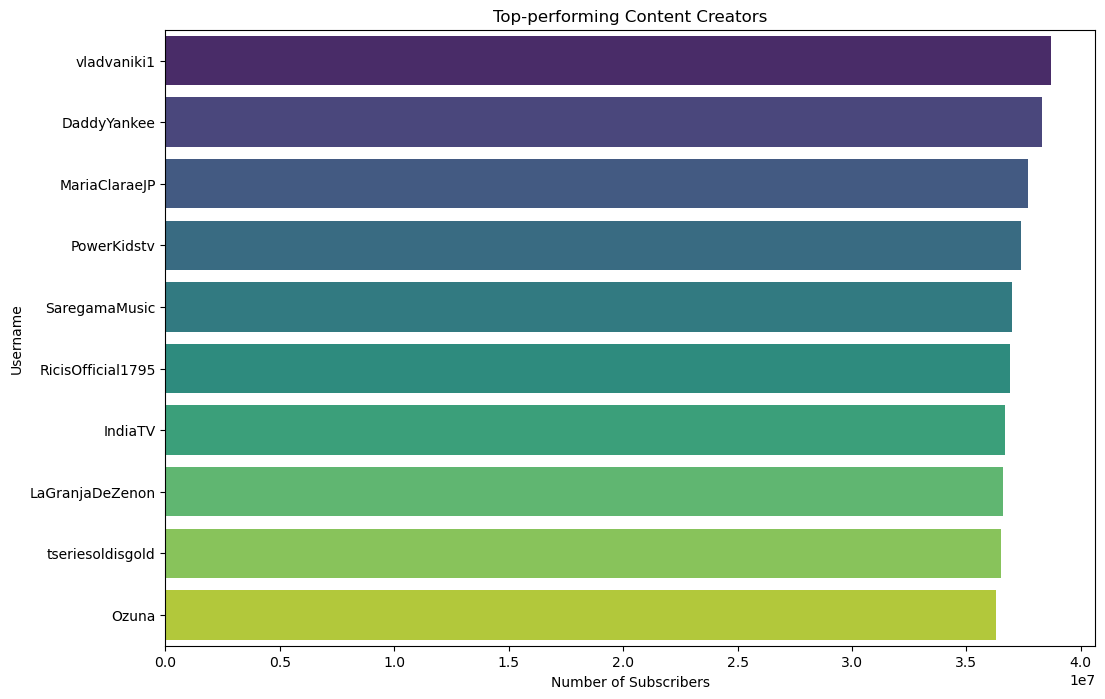

In [33]:
# Plot the performance metrics for the top-performing creators
plt.figure(figsize=(12, 8))
sns.barplot(x='Suscribers', y='Username', data=top_performing_creators, palette='viridis', orient='h')
plt.title('Top-performing Content Creators')
plt.xlabel('Number of Subscribers')
plt.ylabel('Username')
plt.show()


#### Insights

##### Subscriber Dominance:
- The number of subscribers for these top creators is exceptionally high, ranging from tens of millions to hundreds of millions. T-Series, MrBeast, and CoComelon, in particular, have enormous subscriber counts.

##### Varied Engagement Metrics:
- While subscriber counts are high, there is variation in other engagement metrics such as visits, likes, and comments. For example, MrBeast has a significantly high number of visits, likes, and comments, indicating high engagement with their content.

##### Diverse Content Genres:
- Content creators like T-Series and Zee Music Company are associated with music, while MrBeast is known for gaming and philanthropy. CoComelon is focused on children's education and entertainment. This diversity suggests that success on YouTube is achievable across different content genres.

##### Engagement without Comments:
- Some creators, like KidsDianaShow and LikeNastyaofficial, have a substantial number of subscribers and visits but relatively fewer comments. This could imply that their content is engaging without necessarily prompting viewers to comment.

##### International Presence:
- T-Series, SET India, and Zee Music Company have a strong presence in India, while MrBeast and CoComelon cater to a global audience. This highlights the international reach of top-performing YouTube content creators.

##### Zero Comments:
- Some creators, such as CoComelon, KidsDianaShow, and LikeNastyaofficial, have zero comments. This might be due to the nature of their content, which may not elicit as many comments as other genres.

##### Potential for Brand Collaborations:
- Content creators with such high engagement metrics may attract brands for collaborations and marketing campaigns. MrBeast, in particular, with its high likes, visits, and comments, could be a desirable partner for brands looking to reach a large and engaged audience.

##### Influence of Music Content:
- T-Series, Zee Music Company, and WWE are associated with music and entertainment, suggesting the popularity of this genre on YouTube.

## 9. Content Recommendations

Channels that make the have gthe most likes, visitors, and comments are usually the highest performing ones. The content that is most watched world wide is music and dance, but that also depends on the countries preferences, in most countries music, dance, humor, animation are very popular genres and if youtube streamers follow these 